### Plend Data Analyst Task

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data into notebook
data_14 = pd.read_excel('H-1B_FY14_Q4.xlsx')
data_15 = pd.read_excel('H-1B_Disclosure_Data_FY15_Q4.xlsx')
data_16 = pd.read_excel('H-1B_Disclosure_Data_FY16.xlsx')

In [3]:
# Check each dataframe
data_14.head()

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,OFLC ONLINE DATA CENTER,2013.0,ST. LOUIS,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,OFLC ONLINE DATA CENTER,2013.0,INDIANAPOLIS,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,OFLIC ONLINE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330.0
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519.0


In [4]:
data_14.shape

(519504, 35)

In [5]:
# Check for missing values
data_14.isna().sum()

LCA_CASE_NUMBER                        0
STATUS                                 0
LCA_CASE_SUBMIT                        0
DECISION_DATE                          0
VISA_CLASS                             0
LCA_CASE_EMPLOYMENT_START_DATE         4
LCA_CASE_EMPLOYMENT_END_DATE           5
LCA_CASE_EMPLOYER_NAME                28
LCA_CASE_EMPLOYER_ADDRESS             42
LCA_CASE_EMPLOYER_CITY                27
LCA_CASE_EMPLOYER_STATE               46
LCA_CASE_EMPLOYER_POSTAL_CODE         41
LCA_CASE_SOC_CODE                     49
LCA_CASE_SOC_NAME                   4271
LCA_CASE_JOB_TITLE                     7
LCA_CASE_WAGE_RATE_FROM               36
LCA_CASE_WAGE_RATE_TO             416572
LCA_CASE_WAGE_RATE_UNIT               36
FULL_TIME_POS                          5
TOTAL_WORKERS                          3
LCA_CASE_WORKLOC1_CITY                49
LCA_CASE_WORKLOC1_STATE               49
PW_1                                  84
PW_UNIT_1                             77
PW_SOURCE_1     

In [6]:
data_15.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,PW_WAGE_SOURCE_YEAR,PW_WAGE_SOURCE_OTHER,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",710 MEDTRONIC PARKWAY NE,NaN,...,2014.0,ONLINE DATA SURVEY,20000 -,Year,N,N,EDEN PRAIRIE,STERNS,CA,55412
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,905 ASP AVE,NEL BLDG 207,...,2014.0,OFLC ONLINE DATA CENTER,85000.00 -,Year,N,N,NORMAN,CLEVELAND,OK,73019
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,H-1B,01/07/2013,01/06/2016,NOKIA INC.,6021 CONNECTION DRIVE,NaN,...,2012.0,OFLC ONLINE DATA CENTER,94000 -,Year,N,N,SAN DIEGO,SAN DIEGO,CA,92127
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",9510 N. HOUSTON ROSSLYN ROAD,NaN,...,2014.0,OFLC ONLINE DATA CENTER,66000 - 70000,Year,N,N,HOUSTON,HARRIS,TX,77088
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,8250 JONES BRANCH DRIVE,MSA3E,...,2014.0,OFLC ONLINE DATA CENTER,97000 - 143300,Year,N,N,MCLEAN,FAIRFAX,VA,22102


In [7]:
data_15.shape

(618804, 40)

In [8]:
data_15.isna().sum()

CASE_NUMBER                   0
CASE_STATUS                   0
CASE_SUBMITTED                0
DECISION_DATE                 0
VISA_CLASS                    0
EMPLOYMENT_START_DATE        19
EMPLOYMENT_END_DATE          19
EMPLOYER_NAME                23
EMPLOYER_ADDRESS1            26
EMPLOYER_ADDRESS2        307943
EMPLOYER_CITY                31
EMPLOYER_STATE               43
EMPLOYER_POSTAL_CODE         38
EMPLOYER_COUNTRY             22
EMPLOYER_PROVINCE        610044
EMPLOYER_PHONE               62
EMPLOYER_PHONE_EXT       580560
AGENT_ATTORNEY_NAME      227126
AGENT_ATTORNEY_CITY      227128
AGENT_ATTORNEY_STATE     235163
JOB_TITLE                    20
SOC_CODE                     15
SOC_NAME                     16
NAIC_CODE                    20
TOTAL WORKERS                15
FULL_TIME_POSITION           13
PREVAILING_WAGE              67
PW_UNIT_OF_PAY               77
PW_WAGE_LEVEL             28708
PW_WAGE_SOURCE               74
PW_WAGE_SOURCE_YEAR          81
PW_WAGE_

In [9]:
data_16.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,H-1B,2013-02-25,2016-02-24,UNIVERSITY OF MICHIGAN,"PIERPONT COMMONS, INTERNATIONAL CENTER",ANN ARBOR,...,41000.00,0.0,Year,N,N,ANN ARBOR,WASHTENAW,MI,48109,2012-08-31
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,H-1B,2013-08-24,2016-08-23,"GOODMAN NETWORKS, INC.","6400 INTERNATIONAL PARKWAY, SUITE 1000",PLANO,...,400000.00,0.0,Year,N,N,PLANO,COLLIN,TX,75093,2013-03-01
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,H-1B,2013-04-29,2016-04-28,"PORTS AMERICA GROUP, INC.",525 WASHINGTON BOULEVARD,JERSEY CITY,...,264000.00,451100.0,Year,N,N,JERSEY CITY,HUDSON,NJ,07310,2013-04-29
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,H-1B,2013-10-01,2016-09-30,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1551 WEWATTA STREET,DENVER,...,220314.00,600000.0,Year,N,N,DENVER,DENVER,CO,80202,2013-05-29
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,H-1B,2013-10-18,2016-10-17,PEABODY INVESTMENTS CORP.,701 MARKET STREET,ST. LOUIS,...,171.63,0.0,Hour,N,N,ST. LOUIS,ST. LOUIS,MO,63101,NaT


In [10]:
data_16.shape

(647852, 40)

In [11]:
data_16.isna().sum()

CASE_NUMBER                   0
CASE_STATUS                   0
CASE_SUBMITTED                0
DECISION_DATE                 0
VISA_CLASS                    0
EMPLOYMENT_START_DATE        17
EMPLOYMENT_END_DATE          25
EMPLOYER_NAME                15
EMPLOYER_ADDRESS              5
EMPLOYER_CITY                 6
EMPLOYER_STATE               34
EMPLOYER_POSTAL_CODE         21
EMPLOYER_COUNTRY              3
EMPLOYER_PROVINCE        640180
EMPLOYER_PHONE                3
EMPLOYER_PHONE_EXT       613590
AGENT_ATTORNEY_NAME           0
AGENT_ATTORNEY_CITY      241534
AGENT_ATTORNEY_STATE     252062
JOB_TITLE                     7
SOC_CODE                      8
SOC_NAME                      8
NAIC_CODE                     5
TOTAL_WORKERS                 0
FULL_TIME_POSITION       647852
PREVAILING_WAGE               1
PW_UNIT_OF_PAY               49
PW_WAGE_SOURCE               53
PW_SOURCE_YEAR               61
PW_SOURCE_OTHER            8187
WAGE_RATE_OF_PAY_FROM         0
WAGE_RAT

### Data Cleaning

* I can see that the columns in each dataframe are not consistent, therefore I will identify columns to keep and ensure remaining columns have the same titles and data types before concatenating.
* There are also lots of missing values in the dataframes.
* Columns that I will keep are: Case number, Status, Date Case Submitted, Decision Date, Employment Start/End Date, Employer Name, Employer State, Case Soc Name, Case Job Title, Wage Rate of Pay, Wage Rate Unit

In [12]:
# Check columns of 2014 dataframe and select columns to keep
data_14.columns

Index(['LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_SUBMIT', 'DECISION_DATE',
       'VISA_CLASS', 'LCA_CASE_EMPLOYMENT_START_DATE',
       'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_NAME',
       'LCA_CASE_EMPLOYER_ADDRESS', 'LCA_CASE_EMPLOYER_CITY',
       'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_POSTAL_CODE',
       'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_JOB_TITLE',
       'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO',
       'LCA_CASE_WAGE_RATE_UNIT', 'FULL_TIME_POS', 'TOTAL_WORKERS',
       'LCA_CASE_WORKLOC1_CITY', 'LCA_CASE_WORKLOC1_STATE', 'PW_1',
       'PW_UNIT_1', 'PW_SOURCE_1', 'OTHER_WAGE_SOURCE_1', 'YR_SOURCE_PUB_1',
       'LCA_CASE_WORKLOC2_CITY', 'LCA_CASE_WORKLOC2_STATE', 'PW_2',
       'PW_UNIT_2', 'PW_SOURCE_2', 'OTHER_WAGE_SOURCE_2', 'YR_SOURCE_PUB_2',
       'LCA_CASE_NAICS_CODE'],
      dtype='object')

In [13]:
data_14 = data_14[['LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_SUBMIT', 'DECISION_DATE',
                   'LCA_CASE_EMPLOYMENT_START_DATE','LCA_CASE_EMPLOYMENT_END_DATE', 
                   'LCA_CASE_EMPLOYER_NAME','LCA_CASE_EMPLOYER_STATE',
                   'LCA_CASE_SOC_NAME', 'LCA_CASE_JOB_TITLE',
                   'LCA_CASE_WAGE_RATE_FROM','LCA_CASE_WAGE_RATE_UNIT']]
data_14


,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_STATE,LCA_CASE_SOC_NAME,LCA_CASE_JOB_TITLE,LCA_CASE_WAGE_RATE_FROM,LCA_CASE_WAGE_RATE_UNIT
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0,Year
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",IN,Optometrists,OPTOMETRIST,65000.0,Year
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,2014-04-01,2015-04-01,"LHB, INC.",MN,Actors,FOOD SAFETY SCIENTIST,50000.0,Year
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,2014-08-28,2017-08-27,"WAM USA, INC.",GA,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0,Year
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",VA,Computer Programmers,PROGRAMMER ANALYST,62000.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...
519499,I-203-14268-901989,WITHDRAWN,2014-09-29 16:04:28,2014-09-29 17:36:40,2014-09-30,2016-09-29,BROWN AND CALDWELL,CO,Civil Engineers,ENGINEER I,64792.0,Year
519500,I-203-14269-091390,WITHDRAWN,2014-09-26 13:04:09,2014-09-29 13:26:10,2014-09-30,2016-09-29,"ALFRESCO SOFTWARE AMERICAS, INC.",CA,Marketing Managers,VICE PRESIDENT OF AMERICAN SALES & MARKETING S...,200000.0,Year
519501,I-203-14269-543341,DENIED,2014-09-26 15:57:41,2014-09-30 16:33:12,2014-11-03,2016-11-02,PACIFIC RESOURCES FOR EDUCATION AND LEARNING,HI,Chief Executives,PRESIDETN & CHIEF EXECUTIVE OFFICER,135000.0,Year
519502,I-203-14272-891703,WITHDRAWN,2014-09-29 14:15:03,2014-09-29 16:29:13,2014-10-15,2016-10-14,"GROUNDPROBE NORTH AMERICA, LLC",AZ,General and Operations Managers,BUSINESS MANAGER - GROUNDPROBE NORTH AMERICA,142000.0,Year


In [14]:
# Check columns of 2015 dataframe and select columns to keep
data_15.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY',
       'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME',
       'NAIC_CODE', 'TOTAL WORKERS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE',
       'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'PW_WAGE_SOURCE',
       'PW_WAGE_SOURCE_YEAR', 'PW_WAGE_SOURCE_OTHER', 'WAGE_RATE_OF_PAY',
       'WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT', 'WILLFUL VIOLATOR',
       'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE'],
      dtype='object')

In [15]:
data_15 = data_15[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
                   'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
                   'EMPLOYER_NAME','EMPLOYER_STATE',
                   'JOB_TITLE', 'SOC_CODE',
                   'WAGE_RATE_OF_PAY','WAGE_UNIT_OF_PAY']]
data_15

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,02/09/2015,02/28/2015,"MEDTRONIC, INC.",MN,MECHANICAL ENGINEER,17-2141.00,20000 -,Year
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,OK,ASSISTANT PROFESSOR,25-1032,85000.00 -,Year
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,01/07/2013,01/06/2016,NOKIA INC.,TX,RELEASE AND SOFTWARE TEST MANAGER,15-1799,94000 -,Year
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",TX,CONTROL ENGINEERING SPECIALIST,17-2072,66000 - 70000,Year
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,VA,DEVELOPMENT SENIOR,15-1131,97000 - 143300,Year
...,...,...,...,...,...,...,...,...,...,...,...,...
618799,I-203-15271-054455,DENIED,2015-09-28,2015-09-30,10/12/2015,10/12/2017,"MUSEUM OF SCIENCE, INC.",FL,DIRECTOR OF PROJECT MANAGEMENT,11-9041,110000 -,Year
618800,I-203-15271-246596,DENIED,2015-09-28,2015-09-30,12/01/2015,11/30/2017,KEVIN MURPHY USA,CA,DIRECTOR OF EDUCATION,11-2021,120000 - 120000,Year
618801,I-203-15271-650357,DENIED,2015-09-28,2015-09-30,10/23/2015,10/22/2017,STERILIS MEDICAL CORPORATION,MA,PRESIDENT,11-1021,180000 - 250000,Year
618802,I-203-15271-716262,DENIED,2015-09-28,2015-09-30,11/09/2015,11/09/2017,ADAM PENDLETON,NY,STUDIO MANAGER,27-1013,74880 -,Year


In [16]:
# Check columns of 2016 dataframe and select columns to keep
data_16.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAIC_CODE', 'TOTAL_WORKERS', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_SOURCE', 'PW_SOURCE_YEAR',
       'PW_SOURCE_OTHER', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO',
       'WAGE_UNIT_OF_PAY', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE'],
      dtype='object')

In [17]:
data_16 = data_16[['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
                   'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
                   'EMPLOYER_NAME','EMPLOYER_STATE',
                   'JOB_TITLE', 'SOC_CODE',
                   'WAGE_RATE_OF_PAY_FROM','WAGE_UNIT_OF_PAY']]
data_16

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,2013-02-25,2016-02-24,UNIVERSITY OF MICHIGAN,MI,POSTDOCTORAL RESEARCH FELLOW,10-1021.00,41000.00,Year
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,2013-08-24,2016-08-23,"GOODMAN NETWORKS, INC.",TX,CHIEF OPERATING OFFICER,11-1011,400000.00,Year
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,2013-04-29,2016-04-28,"PORTS AMERICA GROUP, INC.",NJ,CHIEF PROCESS OFFICER,11-1011,264000.00,Year
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,2013-10-01,2016-09-30,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CO,"REGIONAL PRESIDEN, AMERICAS",11-1011,220314.00,Year
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,2013-10-18,2016-10-17,PEABODY INVESTMENTS CORP.,MO,PRESIDENT MONGOLIA AND INDIA,11-1011,171.63,Hour
...,...,...,...,...,...,...,...,...,...,...,...,...
647847,I-200-15301-672086,WITHDRAWN,2015-10-28,2015-10-29,NaT,NaT,IBM INDIA PRIVATE LIMITED,NC,NaN,NaN,70304.00,NaN
647848,I-200-15355-392494,WITHDRAWN,2015-12-21,2015-12-21,NaT,NaT,NaN,NaN,NaN,NaN,0.00,NaN
647849,I-200-16063-456774,WITHDRAWN,2016-03-03,2016-03-03,NaT,NaT,TECHNOPLUS INC,TX,NaN,NaN,0.00,NaN
647850,I-200-16069-542344,WITHDRAWN,2016-03-09,2016-03-09,NaT,NaT,L&T TECHNOLOGY SERVICES LIMITED,NJ,NaN,NaN,64147.00,Year


In [18]:
# Renaming columns so they are consistent across the dataframes
data_14 = data_14.rename(columns = {'LCA_CASE_NUMBER':'CASE_NUMBER', 
                                    'STATUS':'CASE_STATUS', 
                                    'LCA_CASE_SUBMIT': 'CASE_SUBMITTED', 
                                    'DECISION_DATE':'DECISION_DATE',
                                    'LCA_CASE_EMPLOYMENT_START_DATE':'EMPLOYMENT_START_DATE',
                                    'LCA_CASE_EMPLOYMENT_END_DATE':'EMPLOYMENT_END_DATE', 
                                    'LCA_CASE_EMPLOYER_NAME':'EMPLOYER_NAME',
                                    'LCA_CASE_EMPLOYER_STATE':'EMPLOYER_STATE',
                                    'LCA_CASE_SOC_NAME':'SOC_CODE', 
                                    'LCA_CASE_JOB_TITLE':'JOB_TITLE',
                                    'LCA_CASE_WAGE_RATE_FROM':'WAGE_RATE_OF_PAY',
                                    'LCA_CASE_WAGE_RATE_UNIT':'WAGE_UNIT_OF_PAY'} )

In [19]:
data_16 = data_16.rename(columns= {'WAGE_RATE_OF_PAY_FROM':'WAGE_RATE_OF_PAY'})

I am now checking the datatypes of each column in the dataframes as my final step before concatenating the dataframes

In [20]:
data_14.dtypes

CASE_NUMBER                      object
CASE_STATUS                      object
CASE_SUBMITTED           datetime64[ns]
DECISION_DATE            datetime64[ns]
EMPLOYMENT_START_DATE    datetime64[ns]
EMPLOYMENT_END_DATE      datetime64[ns]
EMPLOYER_NAME                    object
EMPLOYER_STATE                   object
SOC_CODE                         object
JOB_TITLE                        object
WAGE_RATE_OF_PAY                float64
WAGE_UNIT_OF_PAY                 object
dtype: object

In [21]:
data_15.dtypes

CASE_NUMBER                      object
CASE_STATUS                      object
CASE_SUBMITTED           datetime64[ns]
DECISION_DATE            datetime64[ns]
EMPLOYMENT_START_DATE            object
EMPLOYMENT_END_DATE              object
EMPLOYER_NAME                    object
EMPLOYER_STATE                   object
JOB_TITLE                        object
SOC_CODE                         object
WAGE_RATE_OF_PAY                 object
WAGE_UNIT_OF_PAY                 object
dtype: object

In [22]:
data_16.dtypes

CASE_NUMBER                      object
CASE_STATUS                      object
CASE_SUBMITTED           datetime64[ns]
DECISION_DATE            datetime64[ns]
EMPLOYMENT_START_DATE    datetime64[ns]
EMPLOYMENT_END_DATE      datetime64[ns]
EMPLOYER_NAME                    object
EMPLOYER_STATE                   object
JOB_TITLE                        object
SOC_CODE                         object
WAGE_RATE_OF_PAY                float64
WAGE_UNIT_OF_PAY                 object
dtype: object

Employment start/end date of 2015 data needs to be converted to date format and Wage Rate of pay needs to be converted to a float.

In [23]:
data_15_copy = data_15.copy() # making a copy to avoid warnigns related to setting values on a copy
data_15_copy.loc[:, "EMPLOYMENT_START_DATE"] = pd.to_datetime(data_15_copy['EMPLOYMENT_START_DATE'], errors='coerce',infer_datetime_format=True)
len(data_15_copy.loc[data_15_copy["EMPLOYMENT_START_DATE"].isna()]) 
# As there are only 31 missing values these can be dropped

31

In [24]:
data_15_copy = data_15_copy.dropna(subset=["EMPLOYMENT_START_DATE"])

In [25]:
data_15_copy.shape
# 618804 - 31 = 618773

(618773, 12)

In [26]:
# Following the same process for the end date
data_15_copy.loc[:, "EMPLOYMENT_END_DATE"] = pd.to_datetime(data_15_copy['EMPLOYMENT_END_DATE'], errors='coerce',infer_datetime_format=True)
len(data_15_copy.loc[data_15_copy["EMPLOYMENT_END_DATE"].isna()])
# As there are only 10 missing values these can also be dropped


10

In [27]:
data_15_copy = data_15_copy.dropna(subset=["EMPLOYMENT_END_DATE"])

In [28]:
data_15_copy.shape
# 618773 - 10 = 618763

(618763, 12)

In [29]:
data_15_copy['WAGE_RATE_OF_PAY'].value_counts()
# The values of wage rate of pay are in a range. For simplicity I will choose the lower value of the range. 

60000 -                 28743
60000.00 -              11909
65000 -                  9617
70000 -                  8477
75000 -                  6399
                        ...  
105186 - 179000             1
84781.00 - 130000.00        1
97219 - 133500              1
36670 - 64000               1
145725 - 210000             1
Name: WAGE_RATE_OF_PAY, Length: 104168, dtype: int64

In [32]:
data_15_copy2 = data_15_copy.copy()
# Selecting the first characters up until the first space
data_15_copy2.loc[:,'WAGE_RATE_OF_PAY'] = data_15_copy2['WAGE_RATE_OF_PAY'].str.split().str.get(0)
data_15_copy2

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_CODE,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,2015-02-09,2015-02-28,"MEDTRONIC, INC.",MN,MECHANICAL ENGINEER,17-2141.00,20000,Year
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,2015-01-05,2018-01-04,UNIVERSITY OF OKLAHOMA,OK,ASSISTANT PROFESSOR,25-1032,85000.00,Year
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,2013-01-07,2016-01-06,NOKIA INC.,TX,RELEASE AND SOFTWARE TEST MANAGER,15-1799,94000,Year
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,2015-09-07,2018-09-07,"OMRON OILFIELD AND MARINE, INC.",TX,CONTROL ENGINEERING SPECIALIST,17-2072,66000,Year
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,2015-06-06,2018-06-05,FEDERAL HOME LOAN MORTGAGE CO.,VA,DEVELOPMENT SENIOR,15-1131,97000,Year
...,...,...,...,...,...,...,...,...,...,...,...,...
618799,I-203-15271-054455,DENIED,2015-09-28,2015-09-30,2015-10-12,2017-10-12,"MUSEUM OF SCIENCE, INC.",FL,DIRECTOR OF PROJECT MANAGEMENT,11-9041,110000,Year
618800,I-203-15271-246596,DENIED,2015-09-28,2015-09-30,2015-12-01,2017-11-30,KEVIN MURPHY USA,CA,DIRECTOR OF EDUCATION,11-2021,120000,Year
618801,I-203-15271-650357,DENIED,2015-09-28,2015-09-30,2015-10-23,2017-10-22,STERILIS MEDICAL CORPORATION,MA,PRESIDENT,11-1021,180000,Year
618802,I-203-15271-716262,DENIED,2015-09-28,2015-09-30,2015-11-09,2017-11-09,ADAM PENDLETON,NY,STUDIO MANAGER,27-1013,74880,Year


In [33]:
# Converting the string to a float
data_15_copy2.loc[:,'WAGE_RATE_OF_PAY'] = pd.to_numeric(data_15_copy2['WAGE_RATE_OF_PAY'], errors='coerce')
print(data_15_copy2['WAGE_RATE_OF_PAY'].isna().sum()) # These rows can be dropped as there are only 5
data_15_copy2.dropna(subset=['WAGE_RATE_OF_PAY'], inplace=True)

5


In [34]:
data_15_copy2.dtypes

CASE_NUMBER                      object
CASE_STATUS                      object
CASE_SUBMITTED           datetime64[ns]
DECISION_DATE            datetime64[ns]
EMPLOYMENT_START_DATE    datetime64[ns]
EMPLOYMENT_END_DATE      datetime64[ns]
EMPLOYER_NAME                    object
EMPLOYER_STATE                   object
JOB_TITLE                        object
SOC_CODE                         object
WAGE_RATE_OF_PAY                float64
WAGE_UNIT_OF_PAY                 object
dtype: object

Now all data frames have the same columns and data types.

In [35]:
# Concatenating all dataframes
merged = pd.concat([data_14, data_15_copy2, data_16], axis=0).reset_index(drop=True)
merged

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,JOB_TITLE,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0,Year
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",IN,Optometrists,OPTOMETRIST,65000.0,Year
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,2014-04-01,2015-04-01,"LHB, INC.",MN,Actors,FOOD SAFETY SCIENTIST,50000.0,Year
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,2014-08-28,2017-08-27,"WAM USA, INC.",GA,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0,Year
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",VA,Computer Programmers,PROGRAMMER ANALYST,62000.0,Year
...,...,...,...,...,...,...,...,...,...,...,...,...
1786109,I-200-15301-672086,WITHDRAWN,2015-10-28 00:00:00,2015-10-29 00:00:00,NaT,NaT,IBM INDIA PRIVATE LIMITED,NC,NaN,NaN,70304.0,NaN
1786110,I-200-15355-392494,WITHDRAWN,2015-12-21 00:00:00,2015-12-21 00:00:00,NaT,NaT,NaN,NaN,NaN,NaN,0.0,NaN
1786111,I-200-16063-456774,WITHDRAWN,2016-03-03 00:00:00,2016-03-03 00:00:00,NaT,NaT,TECHNOPLUS INC,TX,NaN,NaN,0.0,NaN
1786112,I-200-16069-542344,WITHDRAWN,2016-03-09 00:00:00,2016-03-09 00:00:00,NaT,NaT,L&T TECHNOLOGY SERVICES LIMITED,NJ,NaN,NaN,64147.0,Year


In [36]:
# Now check for missing values in the dataframe and fill in/ drop where appropriate
merged.isnull().sum()

CASE_NUMBER                 0
CASE_STATUS                 0
CASE_SUBMITTED              0
DECISION_DATE               0
EMPLOYMENT_START_DATE      21
EMPLOYMENT_END_DATE        30
EMPLOYER_NAME              49
EMPLOYER_STATE            106
SOC_CODE                 4280
JOB_TITLE                  18
WAGE_RATE_OF_PAY           36
WAGE_UNIT_OF_PAY           58
dtype: int64

In [37]:
(merged.isnull().sum()/len(merged))*100
# As the percentage of missing values in the columns are so small I will drop rows with missing values. 

CASE_NUMBER              0.000000
CASE_STATUS              0.000000
CASE_SUBMITTED           0.000000
DECISION_DATE            0.000000
EMPLOYMENT_START_DATE    0.001176
EMPLOYMENT_END_DATE      0.001680
EMPLOYER_NAME            0.002743
EMPLOYER_STATE           0.005935
SOC_CODE                 0.239626
JOB_TITLE                0.001008
WAGE_RATE_OF_PAY         0.002016
WAGE_UNIT_OF_PAY         0.003247
dtype: float64

In [38]:
merged.dropna(inplace = True)

In [59]:
merged.isnull().sum()

CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
EMPLOYER_STATE           0
SOC_CODE                 0
JOB_TITLE                0
WAGE_RATE_OF_PAY         0
dtype: int64

In [40]:
# Wage unit of pay needs to be converted into the same units in order to carry out analysis
merged["WAGE_UNIT_OF_PAY"].value_counts()

Year         1664685
Hour          113793
Month           1792
Week             951
Bi-Weekly        424
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [41]:
# Again for simplicity I will just use yearly salary and convert the hourly salary to a yearly salary. 
merged = merged[~merged["WAGE_UNIT_OF_PAY"].str.contains("Month|Week|Bi-Weekly")]
merged["WAGE_UNIT_OF_PAY"].value_counts()

Year    1664685
Hour     113793
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [42]:
# Assuming a 40 hour week and 52 weeks in a year, I will use this to calculate the yearly salary
hour_index = merged[merged['WAGE_UNIT_OF_PAY'].str.contains('Hour')].index
hour_index

Int64Index([     28,      54,      60,      76,      79,      90,      97,
                113,     147,     148,
            ...
            1786048, 1786050, 1786053, 1786055, 1786056, 1786066, 1786097,
            1786098, 1786099, 1786100],
           dtype='int64', length=113793)

In [43]:
merged.loc[hour_index,"WAGE_RATE_OF_PAY"] = merged.loc[hour_index,'WAGE_RATE_OF_PAY'] * 2080
merged.head(30)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,JOB_TITLE,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0,Year
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",IN,Optometrists,OPTOMETRIST,65000.0,Year
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,2014-04-01,2015-04-01,"LHB, INC.",MN,Actors,FOOD SAFETY SCIENTIST,50000.0,Year
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,2014-08-28,2017-08-27,"WAM USA, INC.",GA,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0,Year
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",VA,Computer Programmers,PROGRAMMER ANALYST,62000.0,Year
5,I-200-09203-855998,CERTIFIED,2014-08-20 16:41:05,2014-08-26 22:01:03,2014-08-20,2015-09-14,TAKE ENTERPRISE SERVICES INC,NJ,Computer Programmers,PROGRAMMER ANALYST,69742.0,Year
6,I-200-09205-703458,WITHDRAWN,2014-09-15 16:31:51,2014-09-15 16:38:40,2014-09-15,2015-01-10,"TAKE SOLUTIONS, INC",NJ,Computer Programmers,PROGRAMMER ANLYST,63000.0,Year
7,I-200-09205-927162,CERTIFIED,2014-06-26 13:21:18,2014-07-02 22:01:55,2014-10-12,2017-10-11,"PLATTFORM ADVERTISING, INC.",KS,"Software Developers, Applications",SENIOR APPLICATION DEVELOPER,99403.0,Year
8,I-200-09208-457486,WITHDRAWN,2013-07-17 08:34:07,2014-03-18 09:56:27,2009-08-05,2012-08-04,PROPEL CORP.,KY,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,60000.0,Year
9,I-200-09211-513022,CERTIFIED-WITHDRAWN,2009-07-30 11:37:31,2014-05-13 11:11:01,2009-09-15,2012-09-14,UT HEALTH SCIENCE CENTER AT SAN ANTONIO,TX,"Physicians and Surgeons, All Other",ASSISTANT PROFESSOR,190000.0,Year


In [44]:
# The unit of pay column can now be dropped
merged = merged.drop(columns = ['WAGE_UNIT_OF_PAY'])
merged.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,JOB_TITLE,WAGE_RATE_OF_PAY
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",IN,Optometrists,OPTOMETRIST,65000.0
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,2014-04-01,2015-04-01,"LHB, INC.",MN,Actors,FOOD SAFETY SCIENTIST,50000.0
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,2014-08-28,2017-08-27,"WAM USA, INC.",GA,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",VA,Computer Programmers,PROGRAMMER ANALYST,62000.0


In [45]:
# Now checking for any duplicate and if so these can be dropped
merged.drop_duplicates(inplace=True)

In [46]:
merged.shape

(1778471, 11)

### Analysis

* Which employers files the most petitions?


In [47]:
employer = merged.groupby(['EMPLOYER_NAME']).agg({'CASE_STATUS':'count'}).reset_index()
employer.sort_values(['CASE_STATUS'],ascending=False)

,EMPLOYER_NAME,CASE_STATUS
62516,INFOSYS LIMITED,82354
124316,TATA CONSULTANCY SERVICES LIMITED,43777
141893,WIPRO LIMITED,31173
60336,IBM INDIA PRIVATE LIMITED,25462
2142,ACCENTURE LLP,24580
...,...,...
41602,ENCOM J INC.,1
93912,OPTIMAL PATIENT CARE LLC,1
93913,"OPTIMAL PLUS, INC.",1
93914,"OPTIMAL SATCOM, INC.",1


In [48]:
certified = merged[merged['CASE_STATUS'] == 'CERTIFIED'].groupby(['EMPLOYER_NAME']).agg({'CASE_STATUS':'count'}).reset_index()
certified.sort_values(['CASE_STATUS'],ascending=False)

,EMPLOYER_NAME,CASE_STATUS
59694,INFOSYS LIMITED,82289
118683,TATA CONSULTANCY SERVICES LIMITED,43472
135460,WIPRO LIMITED,27313
2017,ACCENTURE LLP,24289
33448,DELOITTE CONSULTING LLP,21992
...,...,...
60614,"INSYS GROUP, INC. F.K.A INSYS CONSULTING SERVICES",1
60610,INSYNC MANAGEMENT CONSULTING INC,1
60609,INSYNC INC.,1
60608,"INSYGNUM, LLC",1


In [49]:
denied = merged[merged['CASE_STATUS'] == 'DENIED'].groupby(['EMPLOYER_NAME']).agg({'CASE_STATUS':'count'}).reset_index()
denied.sort_values(['CASE_STATUS'],ascending=False)

,EMPLOYER_NAME,CASE_STATUS
7213,IBM INDIA PRIVATE LIMITED,321
5222,ERNST & YOUNG U.S. LLP,251
4275,DELOITTE CONSULTING LLP,219
6399,GOOGLE INC.,129
3436,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,123
...,...,...
6735,"HARLINGEN MEDICAL CENTER, LP",1
6736,"HARMONY FOUNDATION OF NEW JERSEY, INC.",1
6737,HARPER PIERCE & CO.,1
6738,HARPRO TECH INC,1


From the above tables the employer with the most petitions is INFOSYS LIMITED.  Following from this INFOSYS LIMITED also had the most certified cases. On the other hand IBM INDIA PRIVATE LIMITED had the most denied cases.

* Is applicant wage correlated with petition success?

In [50]:
merged['CASE_STATUS'].value_counts()

CERTIFIED              1566159
CERTIFIED-WITHDRAWN     123969
WITHDRAWN                56971
DENIED                   31369
REJECTED                     2
INVALIDATED                  1
Name: CASE_STATUS, dtype: int64

In [51]:
# In order to see the correlation between petition success and wage I will need to encode the case status
# I will set certified to the value of 1 and remaining statuses as 0

In [52]:
# Creating a new dataframe with just status and wage
wage_status = merged[['CASE_STATUS', 'WAGE_RATE_OF_PAY']]
wage_status

,CASE_STATUS,WAGE_RATE_OF_PAY
0,CERTIFIED-WITHDRAWN,50000.0
1,CERTIFIED,65000.0
2,DENIED,50000.0
3,CERTIFIED,48000.0
4,CERTIFIED-WITHDRAWN,62000.0
...,...,...
1786101,CERTIFIED,50459.0
1786102,WITHDRAWN,70200.0
1786103,CERTIFIED,52000.0
1786104,CERTIFIED,92000.0


In [53]:
wage_status = wage_status.copy() # avoids warning
wage_status['CASE_STATUS'] = wage_status['CASE_STATUS'].apply(lambda x: 1 if x == 'CERTIFIED' else 0)

In [54]:
wage_status

,CASE_STATUS,WAGE_RATE_OF_PAY
0,0,50000.0
1,1,65000.0
2,0,50000.0
3,1,48000.0
4,0,62000.0
...,...,...
1786101,1,50459.0
1786102,0,70200.0
1786103,1,52000.0
1786104,1,92000.0


In [55]:
wage_status.corr()

,CASE_STATUS,WAGE_RATE_OF_PAY
CASE_STATUS,1.000000,-0.005052
WAGE_RATE_OF_PAY,-0.005052,1.000000


<AxesSubplot:>

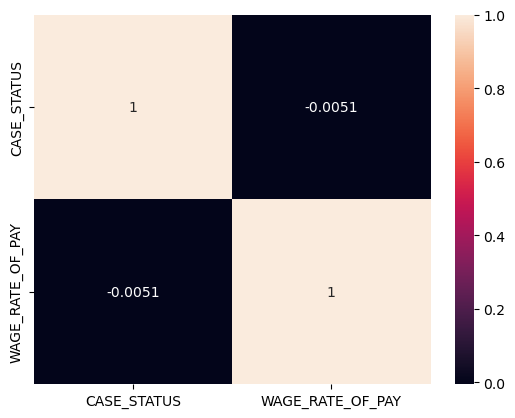

In [56]:
sns.heatmap(wage_status.corr(), annot=True)

As seen above you can see that there is almost no correlation between petition success and wage. 

* Is there a state with higher petition success?

In [57]:
state = merged[merged['CASE_STATUS'] == 'CERTIFIED'].groupby(['EMPLOYER_STATE']).agg({'CASE_STATUS':'count'}).reset_index()
state = state.rename(columns={'CASE_STATUS':'TOTAL CERTIFIED'})
state.sort_values(['TOTAL CERTIFIED'],ascending=False, inplace=True)

<AxesSubplot:xlabel='TOTAL CERTIFIED', ylabel='EMPLOYER_STATE'>

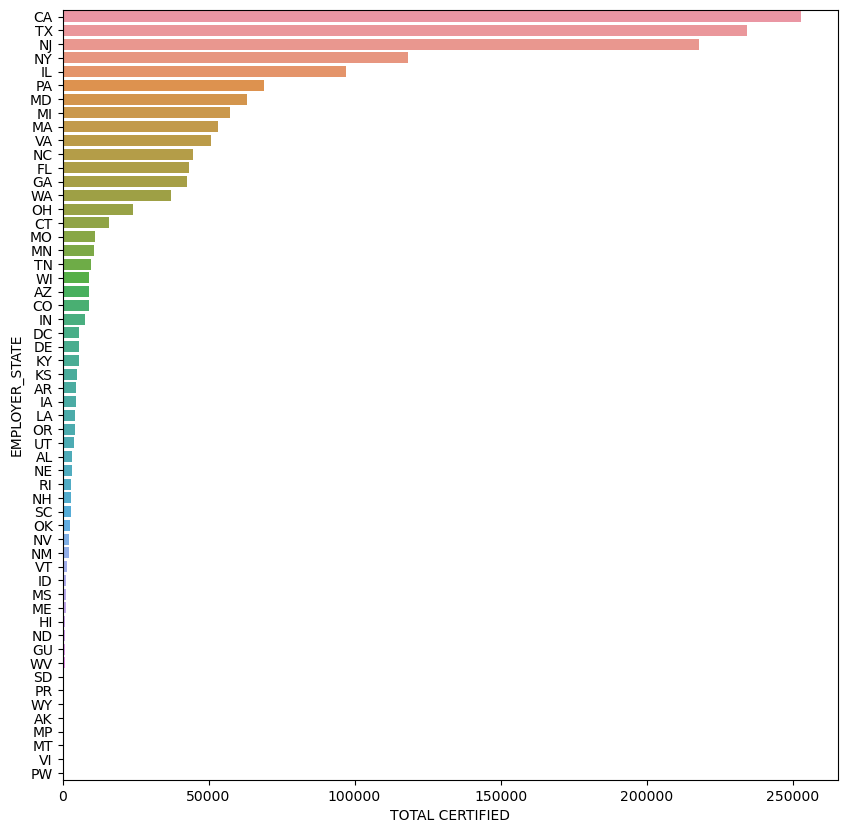

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data = state, y = state['EMPLOYER_STATE'], x=state['TOTAL CERTIFIED'])

From the plot above California has the most certified petitions, followed by Texas.

* Are petitions distributed across time as expected?


In [ ]:
# I will group the decision dates by month to create a plot of the number of petitions across the 3 year period

In [83]:
merged['DECISION_MONTH'] = pd.DatetimeIndex(merged['DECISION_DATE']).month
merged['DECISION_YEAR'] = pd.DatetimeIndex(merged['DECISION_DATE']).year
merged

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,SOC_CODE,JOB_TITLE,WAGE_RATE_OF_PAY,DECISION_MONTH,DECISION_YEAR
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,TX,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,50000.0,9,2014
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",IN,Optometrists,OPTOMETRIST,65000.0,3,2014
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,2014-04-01,2015-04-01,"LHB, INC.",MN,Actors,FOOD SAFETY SCIENTIST,50000.0,3,2014
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,2014-08-28,2017-08-27,"WAM USA, INC.",GA,Accountants and Auditors,INTERNATIONAL ACCOUNTANT,48000.0,3,2014
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",VA,Computer Programmers,PROGRAMMER ANALYST,62000.0,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786101,I-200-16076-099449,CERTIFIED,2016-03-21 00:00:00,2016-03-25 00:00:00,2016-06-30,2019-06-29,LOYOLA UNIVERSITY MARYLAND,MD,54-1124,"AFFILIATE INSTRUCTOR, SPANISH",50459.0,3,2016
1786102,I-200-16056-684951,WITHDRAWN,2016-02-25 00:00:00,2016-03-04 00:00:00,2016-08-19,2019-08-18,"HEXAWARE TECHNOLOGIES, INC.",NJ,69638.00,TECHNICAL ARCHITECT,70200.0,3,2016
1786103,I-200-16140-578441,CERTIFIED,2016-05-19 00:00:00,2016-05-25 00:00:00,2016-06-01,2017-05-31,UNIVERSITY OF MICHIGAN,MI,17-2141,RESEARCH FELLOW,52000.0,5,2016
1786104,I-200-15299-198138,CERTIFIED,2015-10-26 00:00:00,2015-10-30 00:00:00,2015-11-03,2018-11-03,HINDUJA TECH INC.,MI,17-2141,SENIOR ENGINEER,92000.0,10,2015


In [84]:
time = merged.groupby(['DECISION_MONTH','DECISION_YEAR']).agg({'CASE_STATUS':'count'}).reset_index()
time = time.sort_values(by=['DECISION_MONTH'])
time['DECISION_MONTH']= pd.to_datetime(time['DECISION_MONTH'], format='%m').dt.month_name()
time

,DECISION_MONTH,DECISION_YEAR,CASE_STATUS
0,January,2014,27632
1,January,2015,32132
2,January,2016,33811
3,February,2014,54644
4,February,2015,72968
5,February,2016,74690
6,March,2014,137769
7,March,2015,177738
8,March,2016,206511
9,April,2014,42981


<AxesSubplot:xlabel='DECISION_MONTH', ylabel='CASE_STATUS'>

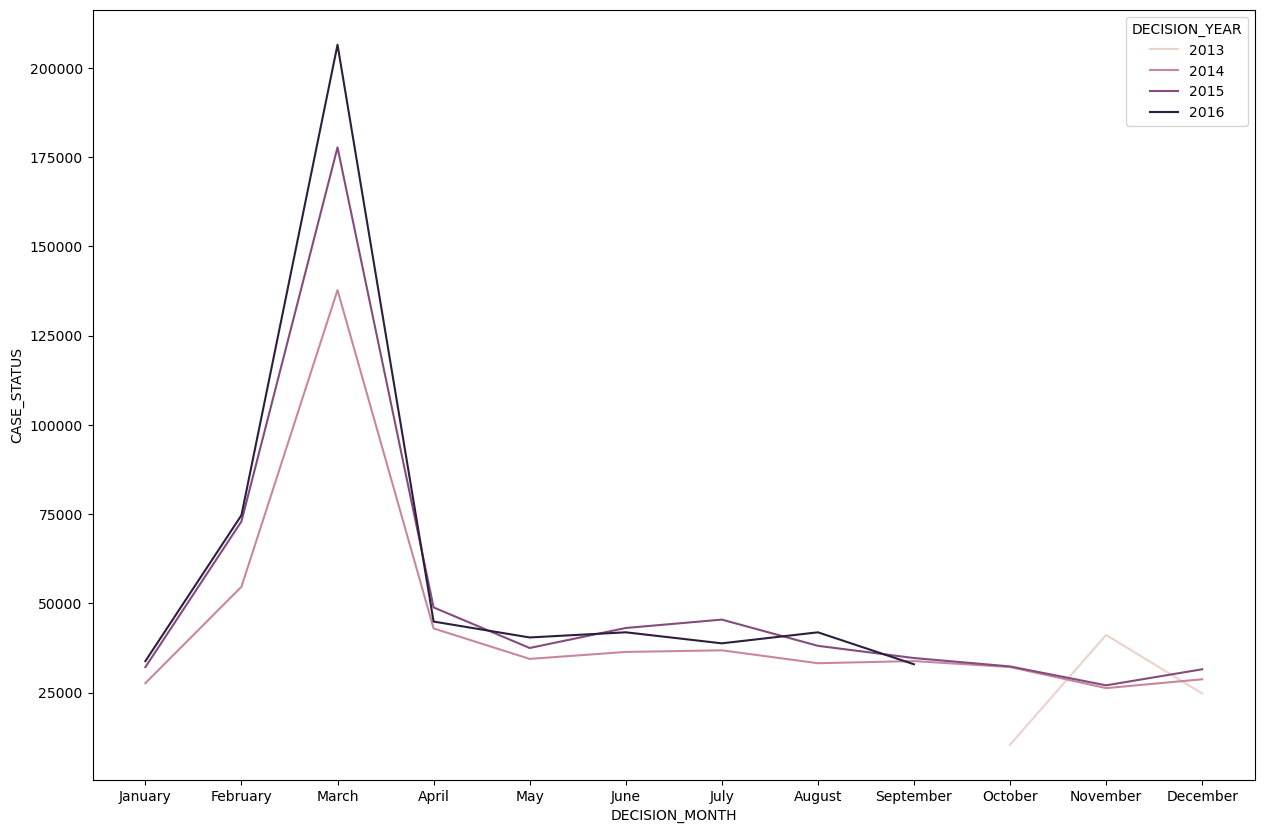

In [85]:
plt.figure(figsize=(15,10))
sns.lineplot(data=time, x=time['DECISION_MONTH'], y=time['CASE_STATUS'], hue=time['DECISION_YEAR'])

From the above chart there is a clear spike of petitions in March across all 3 years. (The H-1B visa year is from October 1st of one year to September 30th of the next year.) This is expected as this earliest possible time for employers to file petitions for the following year beginning on October 1st.